# Codestates Project 2 - Data Science Field Salary

질문. 나와 동기들의 10년뒤 연봉은 얼마나 될까?

Dataset : data_0_Levels_Fyi_Salary_Data.csv  
From : https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries  

Features
- timestamp : 기록시간인듯?
- company : 회사 1632개
- level : 직급인듯? (약 3000)
- title : 하는일
- totalyearlycompensation : 총급여
- location : 위치
- years of experience : 경력
- years at company : 근속연수
- tag : 하는일
- basesalary : 기본급여
- stock grant value : 스톡옵션
- bonus : 보너스
- gender : 성별
- cityid : 도시번호?
- dmaid : media market, 지역분할 방식인듯?
- degree : 학위
- race : 인종  
       [nan, 'White', 'Asian', 'Black', 'Two Or More', 'Hispanic']
- education : 교육  
       [nan, 'PhD', "Master's Degree", "Bachelor's Degree", 'Some College', 'Highschool']

Dataset : data_1_india_data_field.csv  
From : https://www.kaggle.com/datasets/jaiganeshnagidi/data-scientist-salary

Dataset : data_2_cleaned_2021.csv  
From : https://www.kaggle.com/datasets/nikhilbhathi/data-scientist-salary-us-glassdoor  

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

np.set_printoptions(threshold=np.inf)


In [71]:
df_0 = pd.read_csv("data_0_Levels_Fyi_Salary_Data.csv")
print(df_0.shape)
df_0.head(5).T

(62642, 29)


,0,1,2,3,4
timestamp,6/7/2017 11:33:27,6/10/2017 17:11:29,6/11/2017 14:53:57,6/17/2017 0:23:14,6/20/2017 10:58:51
company,Oracle,eBay,Amazon,Apple,Microsoft
level,L3,SE 2,L7,M1,60
title,Product Manager,Software Engineer,Product Manager,Software Engineering Manager,Software Engineer
totalyearlycompensation,127000,100000,310000,372000,157000
location,"Redwood City, CA","San Francisco, CA","Seattle, WA","Sunnyvale, CA","Mountain View, CA"
yearsofexperience,1.5,5.0,8.0,7.0,5.0
yearsatcompany,1.5,3.0,0.0,5.0,3.0
tag,NaN,NaN,NaN,NaN,NaN
basesalary,107000.0,0.0,155000.0,157000.0,0.0


In [72]:
# drop unsued
df_0 = df_0.drop(["otherdetails", "dmaid", "level","rowNumber"], axis=1)

In [73]:
# df.title.unique()
# df_tmp = df_0.dropna(subset="tag")
# df_tmp.otherdetails.unique()

# df_tmp[df_tmp.tag.str.contains("(?i)data")].shape # 1941
# df_tmp[df_tmp.tag.str.contains("(?i)ml")].shape # 4349
# df_tmp[df_tmp.tag.str.contains("(?i)machine")].shape # 86
# df_tmp[df_tmp.tag.str.contains("(?i)eda")].shape # 24
# df.info()


<AxesSubplot:>

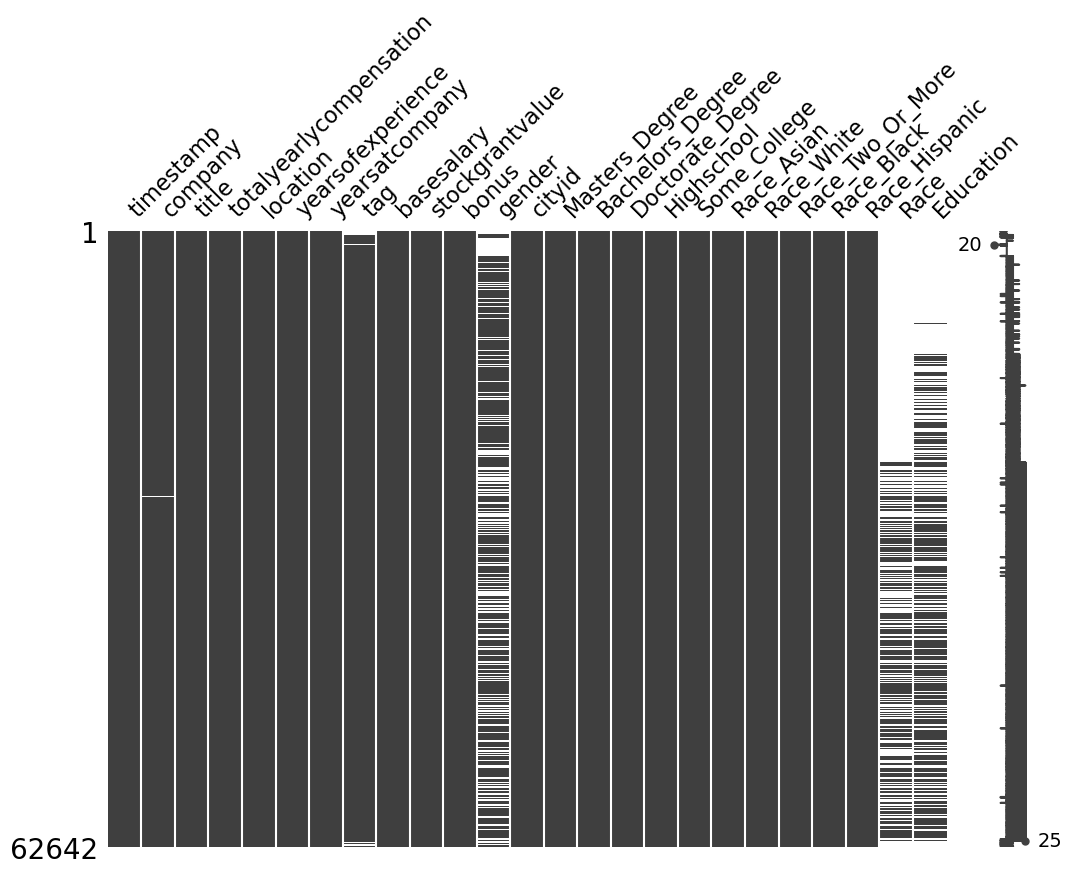

In [74]:
msno.matrix(df_0, figsize=(12, 8))

In [75]:
# 결측치 처리
df_0.isna().sum()
# company : drop
df_0_cln = df_0.dropna(subset="company")

# tag, gender : nan -> no_answer
nan_cols = ["tag", "gender", "Race", "Education"]
df_0_cln[nan_cols] = df_0_cln[nan_cols].fillna("no_answer")

# 
df_0_cln.isna().sum()

C:\Users\TESB\AppData\Local\Temp\ipykernel_15932\3774717547.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0_cln[nan_cols] = df_0_cln[nan_cols].fillna("no_answer")


timestamp                  0
company                    0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
cityid                     0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
Race                       0
Education                  0
dtype: int64

In [76]:
# 이상치 처리
# df_0_cln[df_0_cln.gender == 'Title: Senior Software Engineer'].T
df_0_cln.at[11010,"gender"] = "no_answer"
df_0_cln.gender.unique()

array(['no_answer', 'Male', 'Female', 'Other'], dtype=object)

In [77]:
# feature engineering
def feature_engineering(df):
       
    df = df_0_cln.copy()    

    df.timestamp = pd.to_datetime(df.timestamp)
    df["year"] = df["timestamp"].dt.year
    df["date"] = df["timestamp"].dt.date
    
    return df
    
df_0_eng = feature_engineering(df_0_cln.copy())
df_0_eng.head().T

,0,1,2,3,4
timestamp,2017-06-07 11:33:27,2017-06-10 17:11:29,2017-06-11 14:53:57,2017-06-17 00:23:14,2017-06-20 10:58:51
company,Oracle,eBay,Amazon,Apple,Microsoft
title,Product Manager,Software Engineer,Product Manager,Software Engineering Manager,Software Engineer
totalyearlycompensation,127000,100000,310000,372000,157000
location,"Redwood City, CA","San Francisco, CA","Seattle, WA","Sunnyvale, CA","Mountain View, CA"
yearsofexperience,1.5,5.0,8.0,7.0,5.0
yearsatcompany,1.5,3.0,0.0,5.0,3.0
tag,no_answer,no_answer,no_answer,no_answer,no_answer
basesalary,107000.0,0.0,155000.0,157000.0,0.0
stockgrantvalue,20000.0,0.0,0.0,180000.0,0.0


In [78]:
# sns.displot(df_0_cln,x="yearsofexperience",y="totalyearlycompensation")
# temp = df_0_cln["timestamp"].str.split(pat="/",n=2, expand=True)
# month = temp[0]
# date = temp[1]
# temp = temp[2]
# temp = temp.str.split(pat=" ",n=1, expand=True)
# year = temp[0]
# time = temp[1]
# # df_0_cln["year"] = year

# # for i in df_0_cln.index:
# #     ymd = year.at[i] + month[i] + date[i]
# ymd = [(year.at[i] + month[i] + date[i]) for i in df_0_cln.index]
# ymd
# # df_0_cln["timestamp"]

<AxesSubplot:xlabel='yearsofexperience', ylabel='Count'>

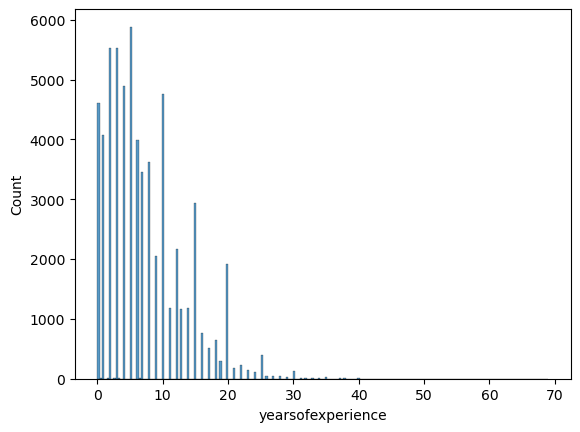

In [79]:
df_0_eng["yearsofexperience"].describe()
plt.close("all")
sns.histplot(df_0_eng["yearsofexperience"])
# plt.hist(df_0_cln["yearsofexperience"])
# xticks = range(0,70)

# plt.xticks(xticks)

In [50]:
df = pd.read_csv("data_1_india_data_field.csv")
print(df.shape)
df.head(5).T

(19802, 9)


,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
experience,5-7 yrs,10-17 yrs,5-9 yrs,7-10 yrs,1-3 yrs
job_description,Exp: Minimum 5 years;Good understanding of IOC...,He should have handled a team of atleast 5-6 d...,Must be an effective communicator (written & s...,7 - 10 years of overall experience in data e...,Chartered Accountancy degree or MBA in Finance...
job_desig,Senior Exploit and Vulnerability Researcher,Head SCM,Deputy Manager - Talent Management & Leadershi...,Associate Manager Data Engineering,TS- GSA- Senior Analyst
job_type,NaN,NaN,Analytics,Analytics,NaN
key_skills,"team skills, communication skills, analytical ...","ppc, logistics, inventory management, supply c...","HR Analytics, Employee Engagement, Training, S...","SQL, Javascript, Automation, Python, Ruby, Ana...","accounting, finance, cash flow, financial plan..."
location,Delhi NCR(Vikas Puri),Sonepat,Delhi NCR,Bengaluru,Gurgaon
salary,6to10,10to15,15to25,10to15,3to6
company_name_encoded,3687,458,4195,313,1305
